#NLP Project- Sentiment analysis on Consumer Reviews of Amazon Products.


Please download the data from-
link- https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products?select=Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv


Dataset name-Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv

Please download this in any google drive before running the code. also please copy the code in the cell for google drive authentication'





# **Business Problem**

**Which product categories have lower reviews or which products have higher reviews?**

**Which products should be kept, or which one can be dropped from Amazon’s product roster (which ones are junk?)**

**Can we associate positive and negative words/sentiments for with each product in Amazon’s Catalog?**

# Hypothesis Question
**Approach 1**
We will also try to figure out that if calculating sentiment for the text on the basis of rating(already present in the dataset) is better ?

# OR
**Approach 2**
Calculating sentiment for the text based on the polarity function from the textblob is better?

(Checking Accuracy through Different models to compare)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The topic of study
 Analysis based on Consumer Reviews of Amazon Products

Background –
 Product reviews are becoming more important with the evolution of traditional brick and mortar retail stores to online shopping. Consumers are posting reviews directly on product pages in real time. With the vast amount of consumer reviews, this creates an opportunity to see how the market reacts to a specific product. We will be attempting to see if we can predict the sentiment of a product review using machine learning tools
 
1.   Consumer Reviews of Amazon Products -


In [ ]:
#Loading Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
%matplotlib inline 
np.random.seed(7) # seeding random number generator



In [ ]:
csv = "/content/drive/MyDrive/Colab Notebooks/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"
df = pd.read_csv(csv)
df.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."


In [ ]:

data = df.copy()
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,4.100000e+01,16115.000000,28332.000000
mean,1.840066e+08,0.529321,4.514048
std,2.337036e+07,9.345017,0.934957
min,1.116244e+08,0.000000,1.000000
25%,1.843344e+08,0.000000,4.000000
50%,1.885078e+08,0.000000,5.000000
75%,1.988160e+08,0.000000,5.000000
max,2.085304e+08,621.000000,5.000000


Based on the descriptive statistics above, we see the following:

Average review score of 4.51, with low standard deviation
Most review are positive from 2nd quartile onwards

The average for number of reviews helpful (reviews.numHelpful) is 0.5 but high standard deviation

1. The data are pretty spread out around the mean, and since can’t have negative people finding something helpful, then this is only on the right tail side
2. The range of most reviews will be between 0-13 people finding helpful (reviews.numHelpful)

The most helpful review was helpful to 621 people

* This could be a detailed, rich review that will be worth looking at




In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

Based on the information above:

Drop reviews.userCity, reviews.userProvince, reviews.id, and reviews.didPurchase since these values are floats (for exploratory analysis only)
Not every category have maximum number of values in comparison to total number of values
reviews.text category has non missing data (28332/28332) -> its good


In [ ]:
data["asins"].unique()

array(['B00QWO9P0O,B00LH3DMUO', 'B00DIHVMEA,B00EZ1ZTV0',
       'B01E6AO69U,B00L9EPT8O', 'B01J24C0TI', 'B073SQYXTW', 'B00ZV9RDKK',
       'B00QWO9P0O,B01IB83NZG,B00MNV8E0C', 'B00WRDS8H0',
       'B00EEBS9O0,B01CHQHIJK', 'B01B66989K,B00CD8ADKO,B00LA9H6UM',
       'B00DUGZFWY', 'B00F5CKWBA,B00KPQCWAU',
       'B0002LCUZK,B010CEC6MI,B01B25NN64', 'B074MCBG25,B075357QFB',
       'B00QFQRELG', 'B006GWO7UA', 'B01L7XWEQQ', 'B006BGZJJ4',
       'B00Y3QOH5G', 'B01BH83OOM', 'B00ZV9PXP2', 'B00NH144GK,B00LA9H1E8',
       'B00OP6SMCI', 'B00BGIQS1A', 'B006LW0W5Y', 'B0751RGYJV',
       'B00IOY8XWQ', 'B010RLCH2U', 'B01GAGYVU2', 'B0752151W6',
       'B018SZT3BK,B01AHB9CN2', 'B018Y226XO', 'B01AHB9CYG', 'B01ACEKAJY',
       'B00REQKWGA', 'B00IOYAM4I', 'B01IO618J8', 'B018Y22BI4',
       'B01AHBBG04', 'B01AHBDCKQ', 'B00VINDBJK',
       'B0189XZRTI,B0189XYY0Q,B0189XZ0KY', 'B01J94SWWU', 'B00QAVO43C',
       'B06VTJWRJW', 'B00QAVNWSK', 'B01J94SCAM', 'B01J94SBEY',
       'B01J94YIT6', 'B01J94T1Z2', 'B018Y224PY'

In [ ]:

asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 65


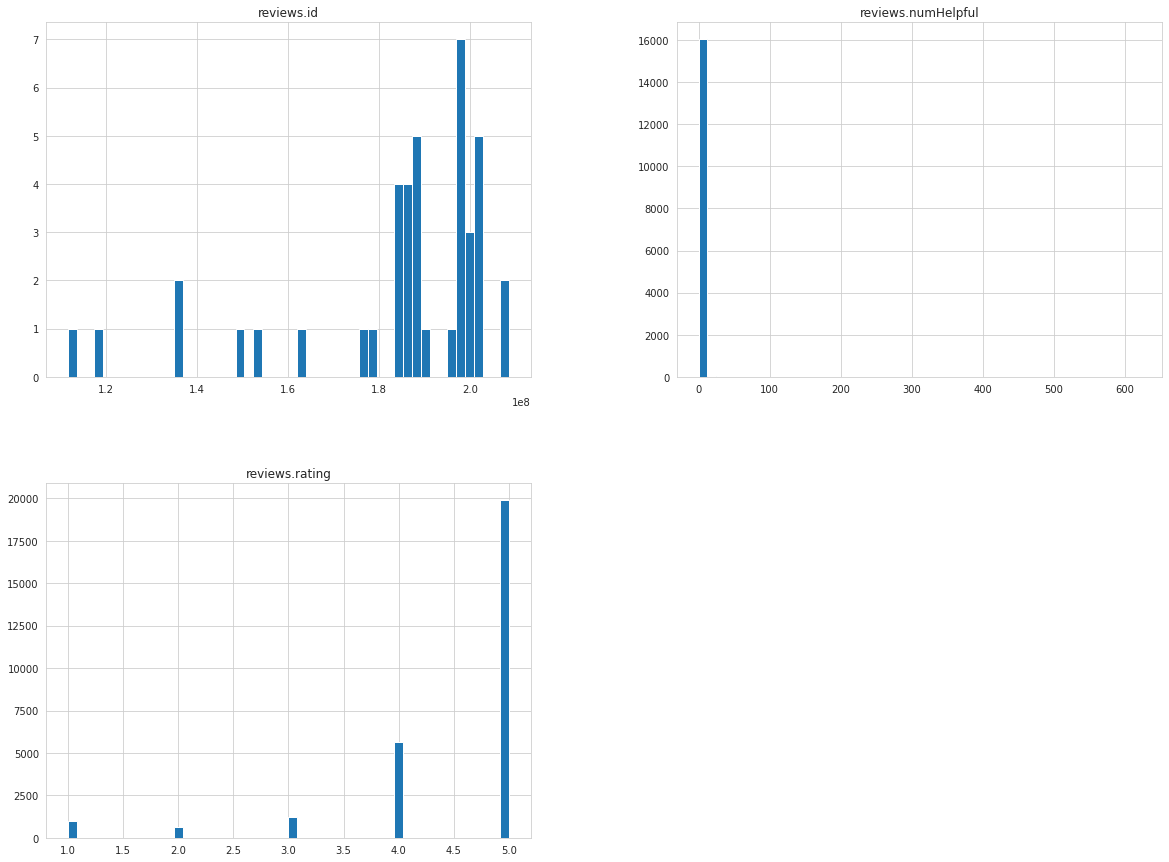

In [ ]:
# Builds histogram and set the number of bins and fig size (width, height)
data.hist(bins=50, figsize=(20,15))
plt.show()

Based on the distributions above:

reviews.numHelpful: Outliers in this case are valuable, so we may want to weight reviews that had more than 50+ people who find them helpful
reviews.rating: Majority of examples were rated highly (looking at rating distribution). There is twice amount of 5 star ratings than the others ratings combined



```
# This is formatted as code
```

**BASIC TEXT CLEANING**

**Spell Correction**
We’ve all seen reviews with a plethora of spelling mistakes. Our timelines are often filled with hastly sent  that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words. For example, “Analytics” and “analytcs” will be treated as different words even if they are used in the same sense.

To achieve this we will use the textblob library.

In [ ]:

from textblob import TextBlob
data['reviews.text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I order 3 of them and one of the item is bad q...
1    Bulk is always the less expensive way to go fo...
2    Well they are not Duracell but for the price i...
3    Seem to work as well as name brand batteries a...
4    These batteries are very long lasting the pric...
Name: reviews.text, dtype: object

In [ ]:
# We could do some of the cleaning steps as a sum of opreation like this:

# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [ ]:
data['reviews.text'] = data['reviews.text'].apply(round1)
data['reviews.text']

0        i order  of them and one of the item is bad qu...
1        bulk is always the less expensive way to go fo...
2        well they are not duracell but for the price i...
3        seem to work as well as name brand batteries a...
4        these batteries are very long lasting the pric...
                               ...                        
28327    i got  of these for my  yr old twins my  yr ol...
28328    i bought this for my niece for a christmas gif...
28329    very nice for light internet browsing keeping ...
28330    this tablet does absolutely everything i want ...
28331    at ninety dollars the expectionations are low ...
Name: reviews.text, Length: 28332, dtype: object

In [ ]:

# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [ ]:
data['reviews.text'] = data['reviews.text'].apply(round2)
data['reviews.text']

0        i order  of them and one of the item is bad qu...
1        bulk is always the less expensive way to go fo...
2        well they are not duracell but for the price i...
3        seem to work as well as name brand batteries a...
4        these batteries are very long lasting the pric...
                               ...                        
28327    i got  of these for my  yr old twins my  yr ol...
28328    i bought this for my niece for a christmas gif...
28329    very nice for light internet browsing keeping ...
28330    this tablet does absolutely everything i want ...
28331    at ninety dollars the expectionations are low ...
Name: reviews.text, Length: 28332, dtype: object

In [ ]:

freq = pd.Series(' '.join(data['reviews.text']).split()).value_counts()[:20]
freq

the          28836
and          22302
i            20586
to           19537
for          17918
a            17599
it           16792
is           11481
my           11149
this         10420
great         9362
of            8408
batteries     8044
as            7656
tablet        6580
with          6044
in            5892
good          5845
that          5654
have          5635
dtype: int64

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import word_tokenize

from nltk.corpus import stopwords
stop = stopwords.words('english')
data['reviews.text'] = data['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['reviews.text'].sample(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


21511         really enjoying love sales person also great
7222     thanks quality batteries prolonged electronics...
14634                   great grandkids know manage better
25358                      great product bought great deal
20235    brought tablet daughter christmas pink favorit...
27992    fire runs well easy set pop adds bit annoying ...
14890    brought tablet yr old xmas loves go tablet alw...
12117    theres lot space amazon basics laptop number g...
13250    waited weeks get new model happy love new feat...
16781    first wanted return product bought yr old deci...
Name: reviews.text, dtype: object

In [ ]:
#Creaing word cloud for most occured words
from wordcloud import WordCloud, STOPWORDS

s= str(data['reviews.text'])

wordcloud = WordCloud(stopwords=stop, background_color="black", max_words=1000).generate(s)

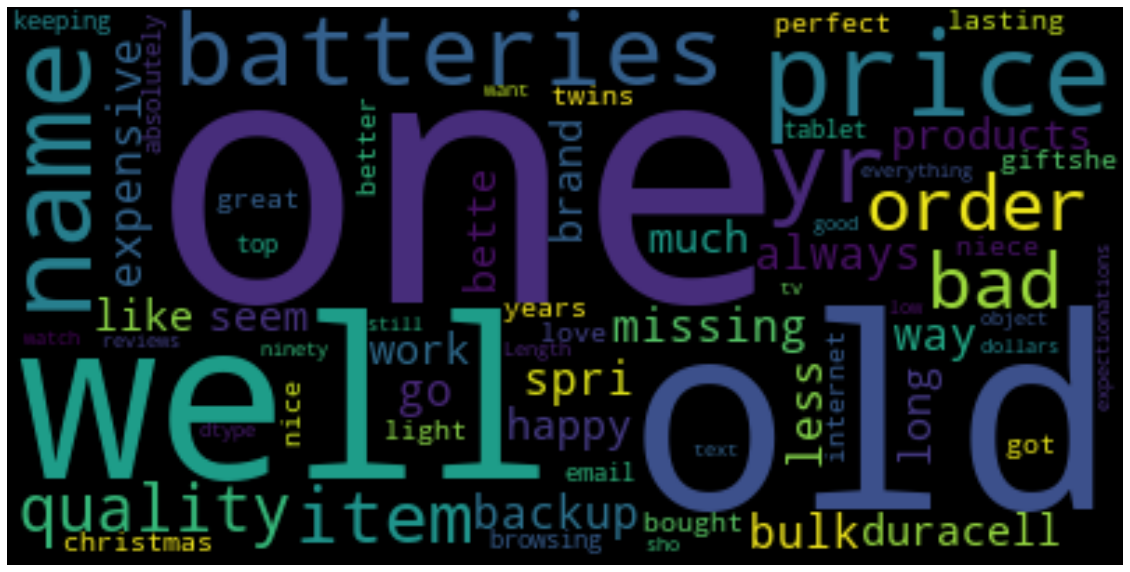

In [ ]:
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**3** Split into Train/Test


Before we explore the dataset we’re going to split it into training set and test sets
Our goal is to eventually train a sentiment analysis classifier
Since the majority of reviews are positive (5 stars), we will need to do a stratified split on the reviews score to ensure that we don’t train the classifier on imbalanced data
To use sklearn’s Stratified ShuffleSplit class, we’re going to remove all samples that have NAN in review score, then covert all review scores to integer datatype

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"])
# Removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

Before 28332
After 28332


**Stratified ShuffleSplit class**

In [ ]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter,
                                           dataAfter["reviews.rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

Check to see if train/test sets were stratified proportionately in comparison to raw data

In [ ]:
len(strat_train)


22665

In [ ]:
strat_train["reviews.rating"].value_counts()/len(strat_train)


5    0.702272
4    0.199338
3    0.042577
1    0.034061
2    0.021752
Name: reviews.rating, dtype: float64

In [ ]:
len(strat_test)


5667

In [ ]:
strat_test["reviews.rating"].value_counts()/len(strat_test)


5    0.702312
4    0.199400
3    0.042527
1    0.034057
2    0.021705
Name: reviews.rating, dtype: float64

4 Data Exploration (Training Set)


We will use regular expressions to clean out any unfavorable characters in our dataset, and then preview what the data looks like after the cleaning.

In [ ]:
reviews = strat_train.copy()
reviews.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
7743,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-07-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,got use classroom various things far differenc...,Tons of batteries for a great price.,ByAustin Braun,"https://www.barcodable.com/upc/841710106442,ht..."
11069,AVpe7xlELJeJML43ypLz,2015-12-03T01:23:41Z,2019-04-24T02:17:42Z,AmazonBasics AA Performance Alkaline Batteries...,"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",Amazonbasics,"AA,AAA,Electronics Features,Health,Electronics...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,amazonbasicsaaperformancealkalinebatteries48co...,AmazonBasics,LR6G0748FFPAB-US,2016-10-10T00:00:00.000Z,2017-06-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,works intended would recommend,I would recommend!,Byjerry chanh ly,"https://www.barcodable.com/upc/841710106411,ht..."


Next, we will explore the following columns:

asins
name
reviews.rating
reviews.doRecommend
(reviews.numHelpful – not possible since numHelpful is only between 0-13 as per previous analysis in Raw Data)
(reviews.text – not possible since text is in long words)
Also, we will explore columns to names(products
)




4.1 names / ASINs


In [ ]:
len(reviews["name"].unique()), len(reviews["asins"].unique()) 


(64, 64)

In [ ]:
reviews.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22665 entries, 7743 to 21093
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   22665 non-null  object 
 1   dateAdded            22665 non-null  object 
 2   dateUpdated          22665 non-null  object 
 3   name                 22665 non-null  object 
 4   asins                22665 non-null  object 
 5   brand                22665 non-null  object 
 6   categories           22665 non-null  object 
 7   primaryCategories    22665 non-null  object 
 8   imageURLs            22665 non-null  object 
 9   keys                 22665 non-null  object 
 10  manufacturer         22665 non-null  object 
 11  manufacturerNumber   22665 non-null  object 
 12  reviews.date         22665 non-null  object 
 13  reviews.dateSeen     22665 non-null  object 
 14  reviews.didPurchase  7 non-null      object 
 15  reviews.doRecommend  12870 non-nu

Working hypothesis: there are only 35 products based on the training data ASINs

One for each ASIN, but more product names (47)
ASINs are what’s important here since we’re concerned with products. There’s a one to many relationship between ASINs and names
A single ASIN can have many names due to different vendor listings
There could also a lot of missing names/more unique names with slight variations in title (ie. 8gb vs 8 gb, NAN for product names)

In [ ]:
reviews.groupby("asins")["name"].unique()


asins
B0002LCUZK,B010CEC6MI,B01B25NN64    [Expanding Accordion File Folder Plastic Porta...
B001NIZB5M                          [Amazon Kindle Replacement Power Adapter (Fits...
B005OOKNP4                          [AmazonBasics Bluetooth Keyboard for Android D...
B006BGZJJ4                          [Amazon Kindle Charger Power Adapter Wall Char...
B006GWO7UA                          [Kindle PowerFast International Charging Kit (...
                                                          ...                        
B06XD5YCKX                          [All-New Kindle Oasis E-reader - 7 High-Resolu...
B073SQYXTW                                               [Echo Spot Pair Kit (Black)]
B074MCBG25,B075357QFB               [Cat Litter Box Covered Tray Kitten Extra Larg...
B0751RGYJV                          [Amazon Echo (2nd Generation) Smart Assistant ...
B0752151W6                          [All-new Echo (2nd Generation) with improved s...
Name: name, Length: 64, dtype: object

there are actually 62 ASINs with one of the product having 2 ASINs or 3 ASINS

In [ ]:
 #Lets see all the different names for this product that have 2 ASINs
different_names = reviews[reviews["asins"] == "B018SZT3BK,B01AHB9CN2"]["name"].unique()
for name in different_names:
  print(name)

All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black


In [ ]:
reviews[reviews["asins"] == "B018SZT3BK,B01AHB9CN2"]["name"].value_counts()


All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black    1875
Name: name, dtype: int64

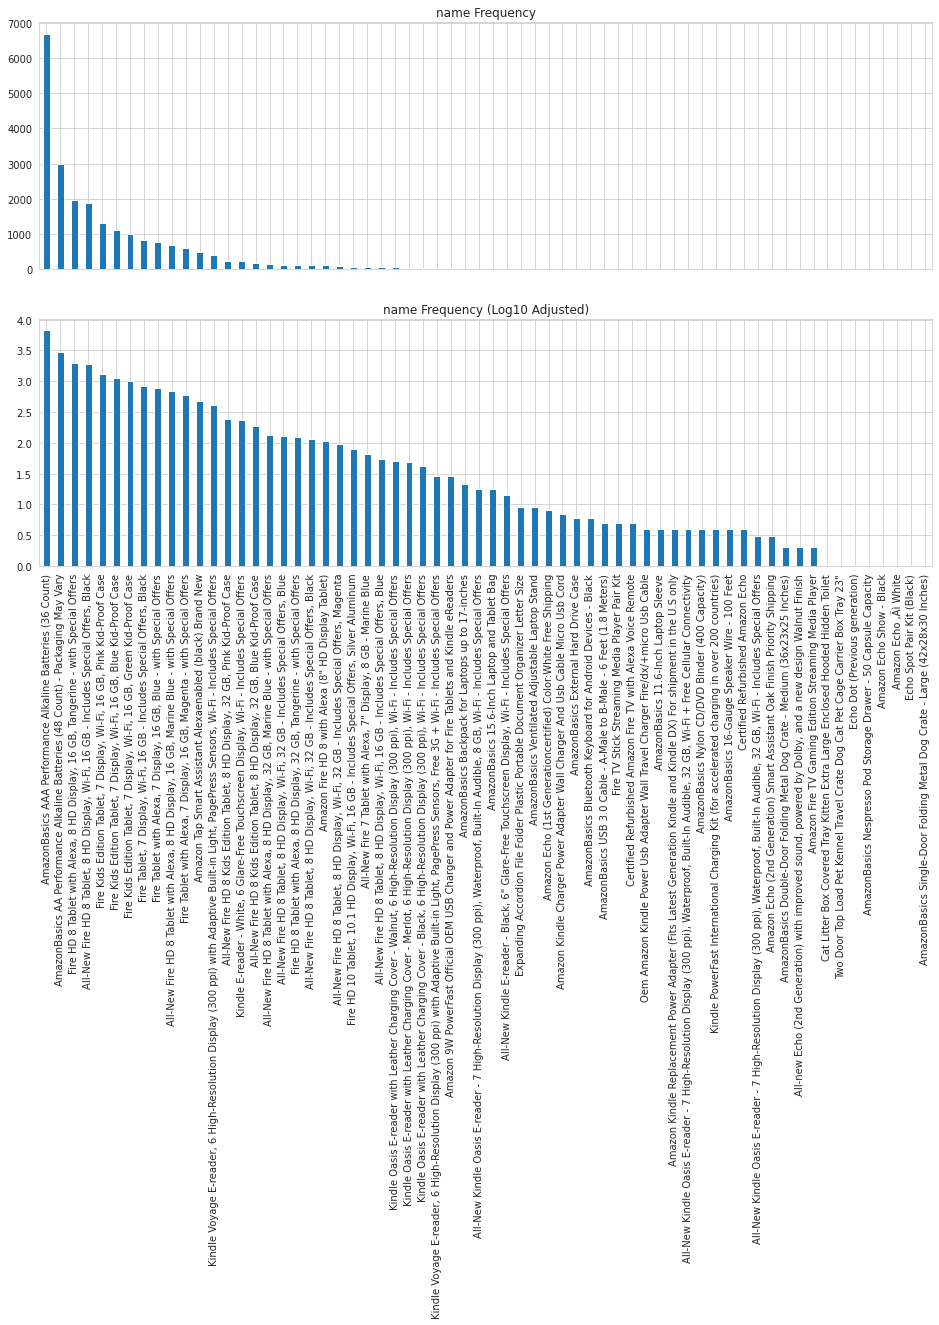

In [ ]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["name"].value_counts().plot(kind="bar", ax=ax1, title="name Frequency")
np.log10(reviews["name"].value_counts()).plot(kind="bar", ax=ax2, 
                                               title="name Frequency (Log10 Adjusted)") 
plt.show()

Confirmed our hypothesis that each ASIN deos not  have multiple names. Therefore we should only really concern ourselves with which product  do well, not the asins .

**Which product categories have lower reviews or which products have
higher reviews ?**

**Which products should be kept or which one can be dropped from
Amazon’s product roster (which ones are junk?)**

**Q-1 and Q-2 ANSWER**

 
AmazonBasics AAA an AA Alkaline Batteries have the highest number of reviews
and Amazon Basics Nylon CD/DVD Binder has the Lowest number of reviews.

Based on the bar graph for Names of products, we see that certain products have significantly more reviews than other products, which may indicate a higher sale in those specific products

We also see that the products have a “right tailed” distribution which can also suggest that certain products have higher sales which can correlate to the higher product frequencies in the reviews

We also took the log of the product to normalize the data, in order display an in-depth picture of each products, and we see that the distribution still follows a “right tailed” distribution

This answers the first question that certain  (products) have better sales, while other products have lower sale, and in turn dictates which products should be kept or dropped.


In [ ]:
# Entire training dataset average rating
reviews["reviews.rating"].mean()

4.514008382969336

**4.2 reviews.rating / names**

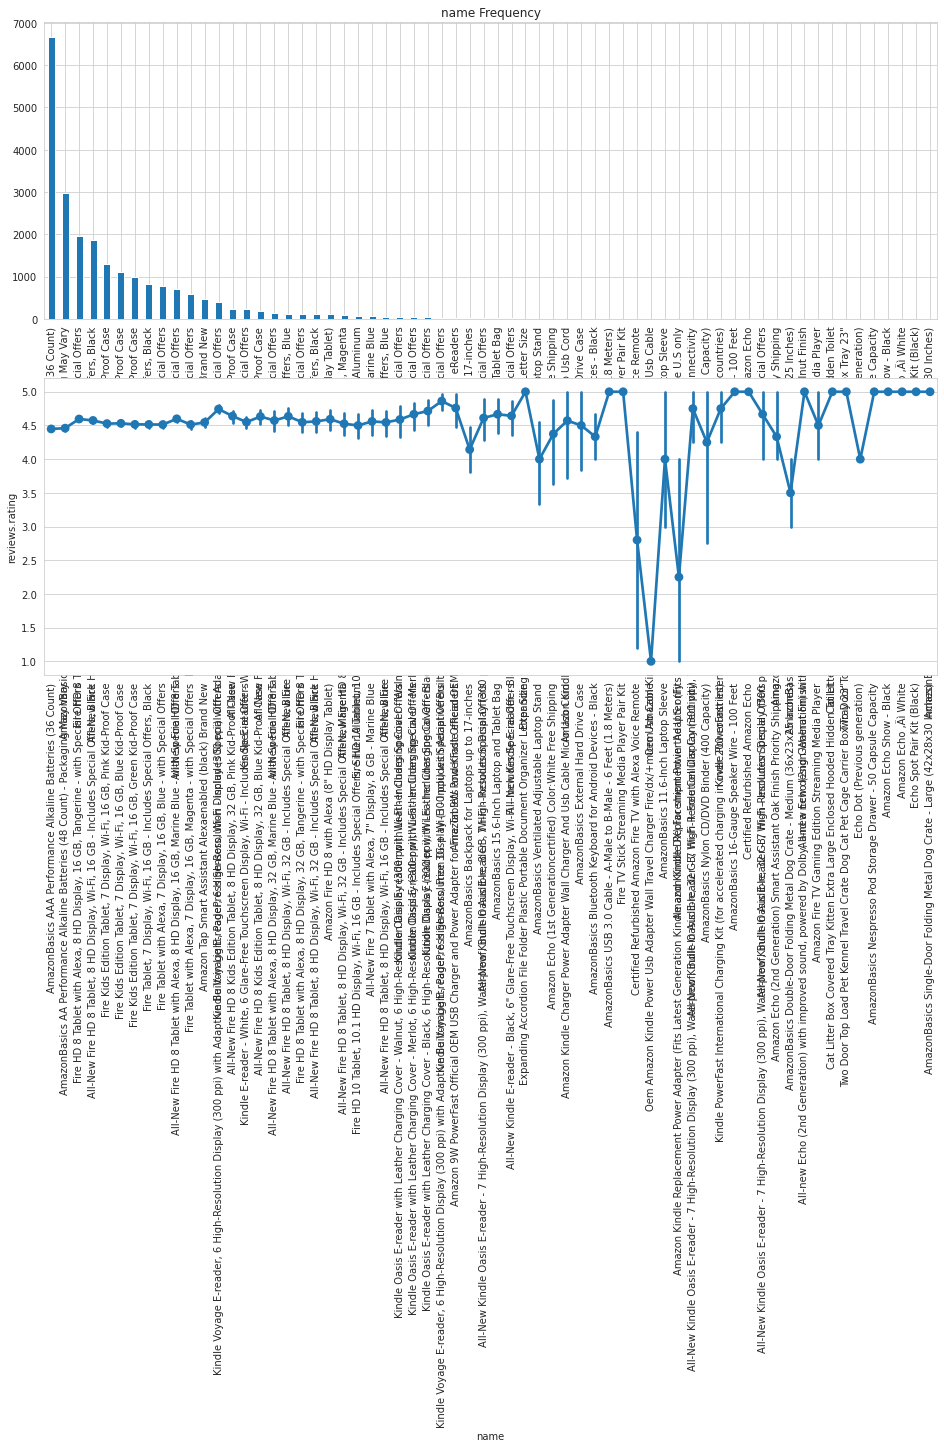

In [ ]:
asins_count_ix = reviews["name"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["name"].value_counts().plot(kind="bar", title="name Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="name", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

****  1a) The most frequently reviewed products have their average review ratings in the 4.5 – 4.8 range, with little variance
1b) Although there is a slight inverse relationship between the name frequency level and average review ratings for the first 4 names, this relationship is not significant since the average review for the first 4 names are rated between 4.5 – 4.8, which is considered good overall reviews
2a) For names with lower frequencies as shown on the bar graph (top), we see that their corresponding average review ratings on the point-plot graph (bottom) has significantly higher variance as shown by the length of the vertical lines. As a result, we suggest that, the average review ratings for names with lower frequencies are not significant for our analysis due to high variance
2b) On the other hand, due to their lower frequencies for names with lower frequencies, we suggest that this is a result of lower quality products
2c) Furthermore, the last 4 names have much variance due to their significantly lower frequencies.

**4.3 reviews.doRecommend / names**

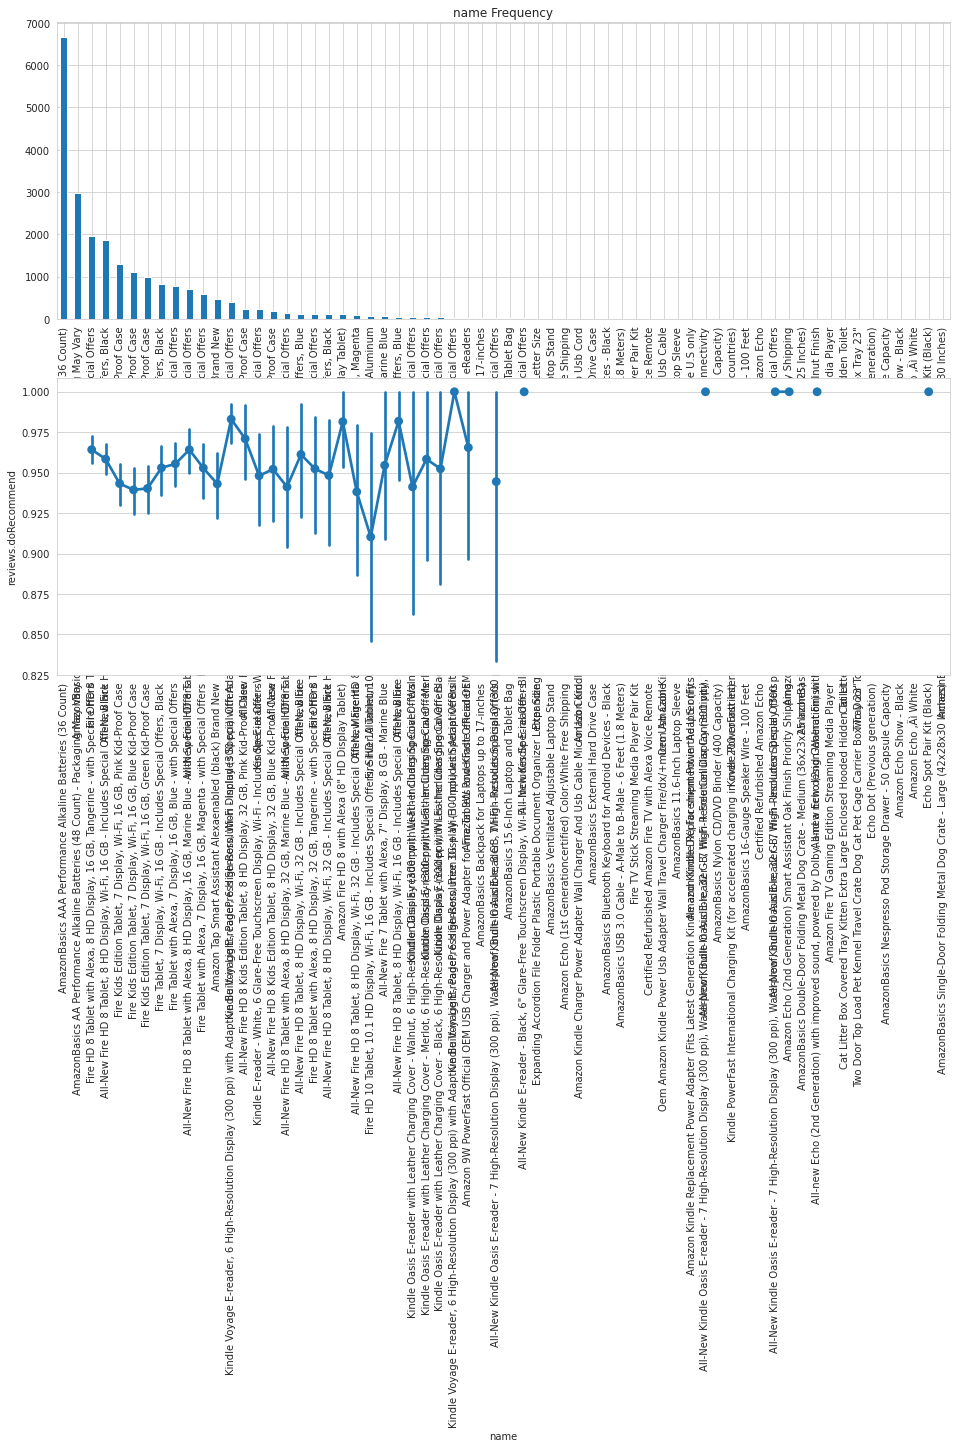

In [ ]:
plt.subplots (2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["name"].value_counts().plot(kind="bar", title="name Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="name", y="reviews.doRecommend", order=asins_count_ix,
              data=reviews)
plt.xticks(rotation=90)
plt.show()


From this analysis, we can see that the first 20-25 names show that consumers recommend the product, which is consistent with the “reviews.rating / name” analysis above, where the first 20-25 names have good ratings between 4.0 to 5.0
The remaining names have fluctuating results due to lower sample size, which should not be considered
Note: reviews.text will be analyzed in Sentiment Analysis.


**5 Correlations**

In [ ]:
corr_matrix = reviews.corr()
corr_matrix
# Here we can analyze reviews.ratings with asins

,reviews.id,reviews.numHelpful,reviews.rating
reviews.id,1.000000,-0.650654,-0.027752
reviews.numHelpful,-0.650654,1.000000,-0.047986
reviews.rating,-0.027752,-0.047986,1.000000


In [ ]:
reviews.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22665 entries, 7743 to 21093
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   22665 non-null  object 
 1   dateAdded            22665 non-null  object 
 2   dateUpdated          22665 non-null  object 
 3   name                 22665 non-null  object 
 4   asins                22665 non-null  object 
 5   brand                22665 non-null  object 
 6   categories           22665 non-null  object 
 7   primaryCategories    22665 non-null  object 
 8   imageURLs            22665 non-null  object 
 9   keys                 22665 non-null  object 
 10  manufacturer         22665 non-null  object 
 11  manufacturerNumber   22665 non-null  object 
 12  reviews.date         22665 non-null  object 
 13  reviews.dateSeen     22665 non-null  object 
 14  reviews.didPurchase  7 non-null      object 
 15  reviews.doRecommend  12870 non-nu

In [ ]:
counts = reviews["name"].value_counts().to_frame()
counts.head(15)

,name
AmazonBasics AAA Performance Alkaline Batteries (36 Count),6676
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary,2976
"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers",1957
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black",1875
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case",1304
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",1121
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",1004
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",829
"Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers",786
"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers",698


In [ ]:
avg_rating = reviews.groupby("name")["reviews.rating"].mean().to_frame()
avg_rating.head()

,reviews.rating
name,
"All-New Fire 7 Tablet with Alexa, 7"" Display, 8 GB - Marine Blue",4.560606
"All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Blue Kid-Proof Case",4.632979
"All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Pink Kid-Proof Case",4.639004
"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers",4.598854
"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Marine Blue - with Special Offers",4.573529


In [ ]:
table = counts.join(avg_rating)
table.head(30)

,name,reviews.rating
AmazonBasics AAA Performance Alkaline Batteries (36 Count),6676,4.448472
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary,2976,4.459677
"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers",1957,4.595810
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black",1875,4.574400
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case",1304,4.527607
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",1121,4.531668
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",1004,4.515936
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",829,4.515078
"Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers",786,4.512723
"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers",698,4.598854


,name,reviews.rating
name,1.000000,0.015431
reviews.rating,0.015431,1.000000


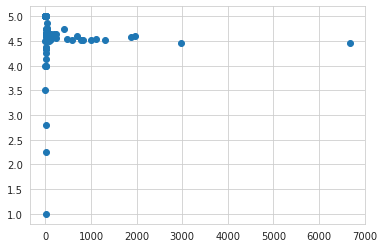

In [ ]:
plt.scatter("name", "reviews.rating", data=table)
table.corr()

From our analysis in data exploration above between names and reviews.rating, we discovered that there are many names with low occurrence that have high variances, as a result we concluded that theses low occurrence names are not significant in our analysis given the low sample size. 

Similarly in our correlation analysis between names and reviews.rating, we see that there is almost no correlation which is consistent with our findings.

# Hypothesis Question
## **Approach 1**( We will also try to figure out if calculating sentiment for the text on the basis of rating(already present in the dataset) and reviews is better)

##                      ***OR***
## **Approach 2**(calculating sentiment for the text based on the polarity function from the textblob  is better?

# **Approach 1**

***6 Sentiment Analysis***


**6.1 Set Target Variable (Sentiments)**


In [ ]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
strat_train["Sentiment"][:20]

7743     Positive
11069    Positive
10510    Positive
24786    Positive
13681    Positive
20085    Positive
23572    Positive
15838    Positive
5138     Positive
3186     Positive
11765     Neutral
21342    Positive
23507    Positive
19971    Positive
11042    Negative
16942    Positive
27761    Positive
26058    Positive
3153     Positive
14671    Positive
Name: Sentiment, dtype: object

In [ ]:
# Prepare data
X_train = strat_train["reviews.text"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["reviews.text"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

22665 5667


22665 training samples and 5667 testing samples.



**6.2 Extract Features**

**Here we will turn content into numerical feature vectors using the Bag of Words strategy:**

Assign fixed integer id to each word occurrence (integer indices to word occurrence dictionary)
X[i,j] where i is the integer indices, j is the word occurrence, and X is an array of words (our training set)
In order to implement the Bag of Words strategy, we will use SciKit-Learn’s CountVectorizer to performs the following:

***Text preprocessing:
Tokenization (breaking sentences into words)
Stopwords (filtering “the”, “are”, etc)
Occurrence counting (builds a dictionary of features from integer indices with word occurrences)
Feature Vector (converts the dictionary of text documents into a feature vector)***


In [ ]:
# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(22665, 11178)

Here we have 22665 training samples and 9636 distinct words in our training sample.

Also, with longer documents, we typically see higher average count values on words that carry very little meaning, this will overshadow shorter documents that have lower average counts with same frequencies, as a result, we will use TfidfTransformer to reduce this redundancy:

Term Frequencies (Tf) divides number of occurrences for each word by total number of words
Term Frequencies times Inverse Document Frequency (Tfidf) downscales the weights of each word (assigns less value to unimportant stop words ie. “the”, “are”, etc)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(22665, 11178)

**6.3 Building a Pipeline from the Extracted Features**

We will use Multinominal Naive Bayes as our Classifier

**Multinominal Niave Bayes** is most suitable for word counts where data are typically represented as word vector counts (number of times outcome number X[i,j] is observed over the n trials), while also ignoring non-occurrences of a feature i
Naive Bayes is a simplified version of Bayes Theorem, where all features are assumed conditioned independent to each other (the classifiers), P(x|y) where x is the feature and y is the classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), 
                             ("tfidf", TfidfTransformer()),
                             ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf_nominalNB',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

**6.4 Test Model**


In [ ]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.9029468854773248

Here we see that our Multinominal Naive Bayes Classifier has a 90.18% accuracy level based on the features. 

Next we will conduct the following:

Test other models
Fine tune the best models to avoid over-fitting

**6.5 Testing Other Models**

Logistic Regression Classifier



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), 
                            ("tfidf", TfidfTransformer()), 
                            ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.9294159167107817

Support Vector Machine Classifier



In [ ]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), 
                               ("tfidf", TfidfTransformer()),
                               ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.9398270689959414

Decision Tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), 
                                  ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())
                                 ])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)


0.9364743250397035

Random Forest Classifier



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), 
                                  ("tfidf", TfidfTransformer()), 
                                  ("clf_randomForest", RandomForestClassifier())
                                 ])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.9516499029468855

**Looks like all the models performed very well (>90%), and we will use the Random Forest Classifier since it has the highest accuracy level at 95.21%.**

**Now we will fine tune the Support Vector Machine model (Linear_SVC) to avoid any potential over-fitting.**

**6.6 Fine tuning the Support Vector Machine Classifier**

Here we will run a Grid Search of the best parameters on a grid of possible values, instead of tweaking the parameters of various components of the chain (ie. use_idf in tfidftransformer)
We will also run the grid search with LinearSVC classifier pipeline, parameters and cpu core maximization
Then we will fit the grid search to our training data set


Finally we will test the accuracy of our final classifier (after fine-tuning)
Note that Support Vector Machines is very suitable for classification by measuring extreme values between classes, to differentiate the worst case scenarios so that it can classify between Positive, Neutral and Negative correctly.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
             'tfidf__use_idf': (True, False), 
             } 
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, 
                                                  X_train_targetSentiment)



predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test) 
np.mean(predictedGS_clf_LinearSVC_pipe == X_test_targetSentiment)

0.9590612316922534

**Results:**


We  see that after running the grid search, our Support Vector Machine Classifier has improved to 96.0% accuracy level

which is highest for analysis 1

**6.7 Detailed Performance Analysis of Support Vector Machine Classifier**

For detailed analysis, we will:

Analyze the best mean score of the grid search (classifier, parameters, CPU core)
Analyze the best estimator
Analyze the best parameter

In [ ]:
for performance_analysis in (gs_clf_LinearSVC_pipe.best_score_, 
                             gs_clf_LinearSVC_pipe.best_estimator_, 
                             gs_clf_LinearSVC_pipe.best_params_):
        print(performance_analysis)

0.9530553717185087
Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf_linearSVC',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_sca

Here we see that the best mean score of the grid search is 95.75% which is very close to our accuracy level of 94.08%
Our best estimator here is also displayed
Lastly, our best parameters are true for use_idf in tfidf, and ngram_range between 1,2

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(X_test_targetSentiment, 
                            predictedGS_clf_LinearSVC_pipe))
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, 
                             predictedGS_clf_LinearSVC_pipe)))

              precision    recall  f1-score   support

    Negative       0.84      0.78      0.81       316
     Neutral       0.88      0.47      0.62       241
    Positive       0.97      0.99      0.98      5110

    accuracy                           0.96      5667
   macro avg       0.90      0.75      0.80      5667
weighted avg       0.96      0.96      0.96      5667

Accuracy: 0.9590612316922534


Below is the summary of the classification report:

Precision: determines how many objects selected were correct
Recall: tells you how many of the objects that should have been selected were actually selected
F1 score measures the weights of recall and precision (1 means precision and recall are equally important, 0 otherwise)
Support is the number of occurrences of each class
The results in this analysis confirms our previous data exploration analysis, where the data are very skewed to the positive reviews as shown by the lower support counts in the classification report. Also, both neutral and negative reviews has large standard deviation with small frequencies, which we would not consider significant as shown by the lower precision, recall and F1 scores in the classification report.

However, despite that Neutral and Negative results are not very strong predictors in this data set, it still shows a 96.01% accuracy level in predicting the sentiment analysis. Therefore, we are comfortable here with the skewed data set. Also, as we continue to input new dataset in the future that is more balanced, this model will then re-adjust to a more balanced classifier which will increase the accuracy level.

Note: The first row will be ignored as we previously replaced all NAN with ” “. We tried to remove this row when we first imported the raw data, but Pandas DataFrame did not like this row removed when we tried to drop all NAN (before stratifying and splitting the dataset). As a result, replacing the NAN with ” ” was the best workaround and the first row will be ignored in this analysis.

Finally, the overall result here explains that the products in this dataset are generally positively rated.

this is a result of positively skewed dataset, which is consistent with both our data exploration and sentiment analysis. Therefore, we conclude that the products in this dataset are generally positively rated, and should be kept from Amazon’s product roster.




*From the analysis above in the classification report, we can see that products with lower reviews are not significant enough to predict these lower rated products are inferior. On the other hand, products that are highly rated are considered superior products, which also performs well and should continue to sell at a high level.*

*As a result, we need to input more data in order to consider the significance of lower rated product, in order to determine which products should be dropped from Amazon’s product roster.*

**The good news is that despite the skewed dataset, we were still able to build a robust Sentiment Analysis machine learning system to determine if the reviews are positive or negative. This is possible as the machine learning system was able to learn from all the positive, neutral and negative reviews, and fine tune the algorithm in order to avoid bias sentiments.**

**In conclusion, although we need more data to balance out the lower rated products to consider their significance, however we were still able to successfully associate positive, neutral and negative sentiments for each product in Amazon’s Catalog.**

# **Approach 2**

**Different Approach- using polarity function from textblob to carryout or derive  negative and positive sentiment  for the text(reviews)and then running the model and testing its accuracy**



If polarity precision is important to your business, you might consider expanding your polarity categories to include:

Very positive
Positive
Neutral
Negative
Very negative
This is usually referred to as fine-grained sentiment analysis, and could be used to interpret 5-star ratings in a review, for example:

Very Positive = 5 stars
Very Negative = 1 star


Creating 'Subjectivity' and 'Polarity' Scores

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

#df['Text']= df['Text'].astype(str)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


strat_test['polarity'] = strat_test["reviews.text"].apply(pol)
strat_test['subjectivity'] = strat_test["reviews.text"].apply(sub)

strat_train['polarity'] = strat_train["reviews.text"].apply(pol)
strat_train['subjectivity'] = strat_train["reviews.text"].apply(sub)

df['polarity'] = df["reviews.text"].apply(pol)
df['subjectivity'] = df["reviews.text"].apply(sub)


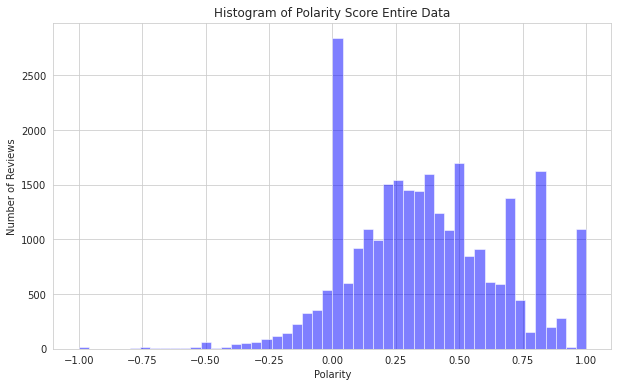

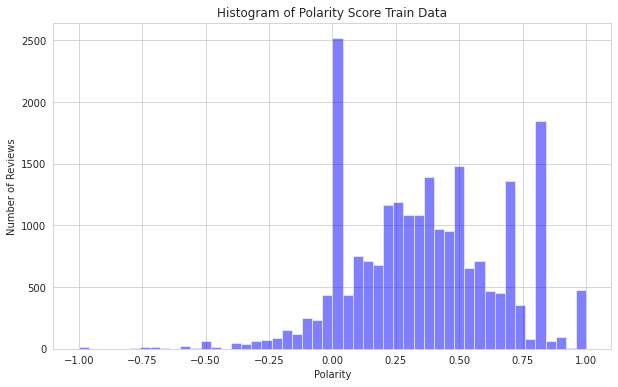

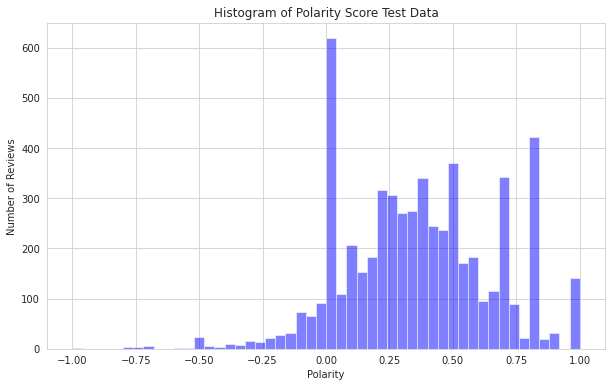

In [ ]:
#Histogram of Polarity Score Entire Data
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score Entire Data')
plt.show();

#Histogram of Polarity Score Train Data
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(strat_train.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score Train Data')
plt.show();
#Histogram of Polarity Score Test Data
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(strat_test.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score Test Data')
plt.show();



**We Can See that  Most of the Reviews have Neutral Sentiment**

In [ ]:
def New_sentiments(polarity):
    if (polarity > 0) :
        return "Positive"
    elif polarity == 0:
        return "Neutral"
    elif polarity < 0:
        return "Negative"
# Add sentiments to the data
strat_train["NEW_Sentiment"] = strat_train["polarity"].apply(New_sentiments)
strat_test["NEW_Sentiment"] = strat_test["polarity"].apply(New_sentiments)
strat_train.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,Sentiment,polarity,subjectivity,NEW_Sentiment
7743,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-07-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,got use classroom various things far differenc...,Tons of batteries for a great price.,ByAustin Braun,"https://www.barcodable.com/upc/841710106442,ht...",Positive,0.300000,0.750000,Positive
11069,AVpe7xlELJeJML43ypLz,2015-12-03T01:23:41Z,2019-04-24T02:17:42Z,AmazonBasics AA Performance Alkaline Batteries...,"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",Amazonbasics,"AA,AAA,Electronics Features,Health,Electronics...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,amazonbasicsaaperformancealkalinebatteries48co...,AmazonBasics,LR6G0748FFPAB-US,2016-10-10T00:00:00.000Z,2017-06-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,works intended would recommend,I would recommend!,Byjerry chanh ly,"https://www.barcodable.com/upc/841710106411,ht...",Positive,0.000000,0.000000,Neutral
10510,AVpe7xlELJeJML43ypLz,2015-12-03T01:23:41Z,2019-04-24T02:17:42Z,AmazonBasics AA Performance Alkaline Batteries...,"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",Amazonbasics,"AA,AAA,Electronics Features,Health,Electronics...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,amazonbasicsaaperformancealkalinebatteries48co...,AmazonBasics,LR6G0748FFPAB-US,2016-11-08T00:00:00.000Z,2017-06-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,massive collection batteries love,Good Price!,ByKengrove,"https://www.barcodable.com/upc/841710106411,ht...",Positive,0.250000,0.800000,Positive
24786,AVqVGWLKnnc1JgDc3jF1,2017-03-03T16:55:53Z,2019-02-25T02:03:34Z,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y23MNM,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,53-004683,2016-12-24T00:00:00.000Z,"2017-03-05T00:00:00Z,2017-06-04T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5026300/review...,greati love itim glad got itmy nephew loves,Great,Blue,http://reviews.bestbuy.com/3545/5026300/review...,Positive,0.500000,0.800000,Positive
13681,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-01-07T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5538501/review...,fast processing great battery reads eyes bothe...,Best Kindle to date,kristijudy,http://reviews.bestbuy.com/3545/5620406/review...,Positive,0.333333,0.483333,Positive


In [ ]:
strat_test.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,Sentiment,polarity,subjectivity,NEW_Sentiment
9806,AVpe7xlELJeJML43ypLz,2015-12-03T01:23:41Z,2019-04-24T02:17:42Z,AmazonBasics AA Performance Alkaline Batteries...,"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",Amazonbasics,"AA,AAA,Electronics Features,Health,Electronics...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,amazonbasicsaaperformancealkalinebatteries48co...,AmazonBasics,LR6G0748FFPAB-US,2017-01-23T00:00:00.000Z,2017-06-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,pleased,Five Stars,ByPauline,"https://www.barcodable.com/upc/841710106411,ht...",Positive,0.500000,1.000000,Positive
16200,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-01-06T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5538501/review...,easily added apps including google play store ...,"Great value, performance for the price",SomeRandomGuy,http://reviews.bestbuy.com/3545/5620406/review...,Positive,0.433333,0.520833,Positive
27901,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,53-004485,2016-12-14T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,like old kindle fire like new one better bette...,nice tablet,fudge,http://reviews.bestbuy.com/3545/5620410/review...,Positive,0.309091,0.413636,Positive
2502,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-06-14T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,great price last long bigger name brands cost ...,Five Stars,ByBig D,"https://www.barcodable.com/upc/841710106442,ht...",Positive,0.187500,0.429167,Positive
4577,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2015-12-15T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,good batteries christmas lights like fact recy...,Good deal on AA's,BySlowsync,"https://www.barcodable.com/upc/841710106442,ht...",Positive,0.700000,0.600000,Positive


Q-3 Answer
**Can we associate positive and negative words/sentiments for
with each product in Amazon’s Catalog?**
We have used Polarty function from the textblob library to derive the sentiments from the text(reviews) and 
We have sucessfully map the sentiment to each product and now we will be testing it for our model accuracy

In [ ]:
# Prepare data
X_train = strat_train["reviews.text"]
X_train_targetSentiment = strat_train["NEW_Sentiment"]
X_test = strat_test["reviews.text"]
X_test_targetSentiment = strat_test['NEW_Sentiment']
print(len(X_train), len(X_test))

22665 5667


In [ ]:
# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(22665, 11178)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(22665, 11178)

MNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), 
                             ("tfidf", TfidfTransformer()),
                             ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf_nominalNB',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.8334215634374449

**Testing Different MODEL**

LRC

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), 
                            ("tfidf", TfidfTransformer()), 
                            ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.9516499029468855

SVMC

In [ ]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), 
                               ("tfidf", TfidfTransformer()),
                               ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.976883712722781

DTC

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), 
                                  ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())
                                 ])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

0.96929592376919

RFC

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), 
                                  ("tfidf", TfidfTransformer()), 
                                  ("clf_randomForest", RandomForestClassifier())
                                 ])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.9560614081524617

FINE TUNING SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
             'tfidf__use_idf': (True, False), 
             } 
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, 
                                                  X_train_targetSentiment)



predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test) 
np.mean(predictedGS_clf_LinearSVC_pipe == X_test_targetSentiment)

0.9735309687665431

# **Graph for Analysis 1  and 2**

In [ ]:

Model = {'Model': ['Multinominal Niave Bayes','Logistic Regression Classifier','Support Vector Machine Classifier','Decision Tree Classifier','Random Forest Classifier','Fine tuning the Support Vector Machine Classifier'],
        'Accuracy': [90.2,92.9,93.9,93.6,95.1,95.9]
        }

Analysis_1 = pd.DataFrame(Model, columns = ['Model', 'Accuracy'])

print (Analysis_1)

                                               Model  Accuracy
0                           Multinominal Niave Bayes      90.2
1                     Logistic Regression Classifier      92.9
2                  Support Vector Machine Classifier      93.9
3                           Decision Tree Classifier      93.6
4                           Random Forest Classifier      95.1
5  Fine tuning the Support Vector Machine Classifier      95.9


In [ ]:

Model = {'Model': ['Multinominal Niave Bayes','Logistic Regression Classifier','Support Vector Machine Classifier','Decision Tree Classifier','Random Forest Classifier','Fine tuning the Support Vector Machine Classifier'],
        'Accuracy': [83.3,95.1,97.6,96.9,95.6,97.35]
        }

Analysis_2 = pd.DataFrame(Model, columns = ['Model', 'Accuracy'])

print (Analysis_2)

                                               Model  Accuracy
0                           Multinominal Niave Bayes     83.30
1                     Logistic Regression Classifier     95.10
2                  Support Vector Machine Classifier     97.60
3                           Decision Tree Classifier     96.90
4                           Random Forest Classifier     95.60
5  Fine tuning the Support Vector Machine Classifier     97.35


In [ ]:
import plotly.express as px

fig = px.line(Analysis_1, x="Model", y="Accuracy", title='Analysis 1 -Different models accuracy',height=600,width=1200)
fig.show()


fig = px.line(Analysis_2, x="Model", y="Accuracy", title='Analysis 2 -Different models accuracy',height=600, width=1200)
fig.show()

# **With this approach 2**

# **we can say that our model not only have predicted the correct sentiment for the different amazon products but also has increased the accuracy level to 97.35%. which is increace of 2 percent when compared to approach 1**

# **Thus based on the analysis and after comparing two approaches we are rejecting approch 1 and accepting approach 2**

# ***NOW its the time to Display the outcomes and analysis***

## **UI PART**

We will procide .py file to run our application and readme instruction on how to run it.
Also we would be showing our appllication at the time of prsentation.

# **Reference links-**
https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-language-model-nlp-python-code/
https://stackabuse.com/text-generation-with-python-and-tensorflow-keras/
https://towardsdatascience.com/the-fall-of-rnn-lstm-2d1594c74ce0
https://github.com/EnesGokceDS/Amazon_Reviews_NLP_Capstone_Project/blob/master/3_Sentiment_Analysis_Amazon_Review.ipynb
https://stackoverflow.com/questions/64918649/streamlit-with-colab-and-pyngrok-failed-to-complete-tunnel-connection-versio
https://stackoverflow.com/questions/51160019/countvectorizer-attributeerror-numpy-float64-object-has-no-attribute-low
https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/
https://stackabuse.com/python-for-nlp-word-embeddings-for-deep-learning-in-keras/
https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
https://stackoverflow.com/questions/58602285/what-is-the-difference-between-from-keras-models-import-sequential-and-from-t
https://stackabuse.com/removing-stop-words-from-strings-in-python/
https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/
https://stackoverflow.com/questions/15547409/how-to-get-rid-of-punctuation-using-nltk-tokenizer
